In [ ]:
import pandas as pd

load data

In [ ]:
eqbench_df = pd.read_csv("data/2024-02-07/eqbench.csv")
lmsys_df = pd.read_csv("data/2024-02-07/lmsys.csv")

calc correlation

In [ ]:
# normalize model names
eqbench_df['Model'] = eqbench_df['Model'].apply(lambda x: x.split('/')[-1].lower())
lmsys_df['Model'] = lmsys_df['🤖 Model'].apply(lambda x: x.lower())
lmsys_df.rename(columns={'⭐ Arena Elo': 'Arena ELO'}, inplace=True)

normalized_intersection = pd.merge(eqbench_df, lmsys_df, on='Model', how='inner')
normalized_scores_df = normalized_intersection[['Arena ELO', 'EQ-Bench v2 Score*']]

# calculate correlations (Pearson, Spearman, Kendall's tau)
normalized_pearson_corr = normalized_scores_df.corr(method='pearson')
normalized_spearman_corr = normalized_scores_df.corr(method='spearman')
normalized_kendall_corr = normalized_scores_df.corr(method='kendall')

# Print the correlations
print("Pearson correlation:", normalized_pearson_corr.iloc[0, 1])
print("Spearman correlation:", normalized_spearman_corr.iloc[0, 1])
print("Kendall's tau correlation:", normalized_kendall_corr.iloc[0, 1])

visualise

In [65]:
# adding MT Bench scores
normalized_pearson_corr.loc[:, 'MT Bench'] = None  
normalized_pearson_corr.loc['MT Bench', :] = None  

normalized_pearson_corr.loc['MT Bench', 'Arena ELO'] = 0.9  
normalized_pearson_corr.loc['Arena ELO', 'MT Bench'] = 0.9 

normalized_pearson_corr.loc['MT Bench', 'MT Bench'] = 1.0

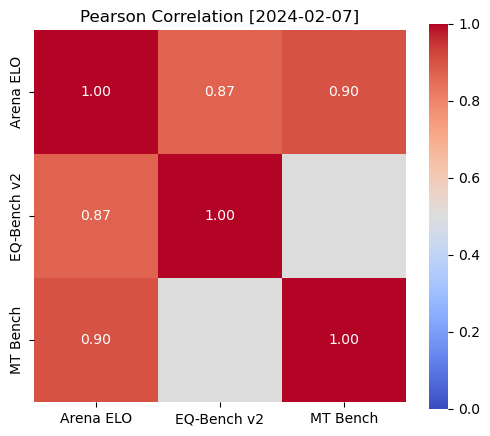

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

normalized_pearson_corr = normalized_pearson_corr.astype(float)

row_labels = ['Arena ELO', 'EQ-Bench v2', 'MT Bench']
plt.figure(figsize=(6, 5))
g = sns.heatmap(normalized_pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=0, vmax=1, cbar=True, square=True, xticklabels=row_labels, yticklabels=row_labels)
g.set_facecolor('gainsboro')
plt.title('Pearson Correlation [2024-02-07]')
#plt.show()
plt.savefig('results/arena-eqbench-mtbench.')